In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import PIL
%matplotlib inline

In [4]:
from torchvision import datasets
from skimage.feature import local_binary_pattern,greycomatrix,greycoprops
from skimage.filters import gabor

In [5]:
train_dataset=datasets.CIFAR10(root='./cifar10',
                              train=True,download=True)

test_dataset=datasets.CIFAR10(root='./cifar10',
                              train=False,download=True)

Files already downloaded and verified


In [6]:
#Know the size of dataset
print(len(train_dataset))
print(len(test_dataset))

50000
10000


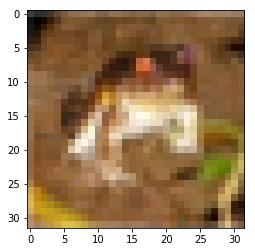

In [7]:
img=train_dataset[0][0]
gray_img=img.convert('L')
img_arr=np.array(gray_img)
plt.imshow(img)

In [8]:
#LBP

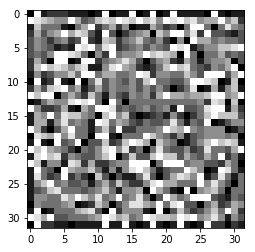

In [9]:
lpb=local_binary_pattern(img_arr,8,1,'uniform')
lpb=np.uint8((lpb/lpb.max())*255)
lpb_img=PIL.Image.fromarray(lpb)
plt.imshow(lpb_img,cmap='gray')

In [11]:
lbp_hist,_ = np.histogram(lpb,8)
lbp_hist = np.array(lbp_hist,dtype=float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy = '+str(lbp_energy))
print('LBP entropy = '+str(lbp_entropy))

LBP energy = 0.14321517944335938
LBP entropy = 2.8958499002961196
